# Frank Hertz Experiment

### Abstract:

To experimentally demonstrate the concept of quantization of energy levels according to Bohr’s model of atom.

### Introduction and theoretical overview:

By means of atomic collision processes, James Franck and Gustav Hertz experimentally demonstrated the existence of quantized energy levels in atoms. This is in agreeance with Bohr's model of the atom.

### Experimental Setup and Procedures:
A mercury-filled Franck-Hertz tube, a neon-filled Franck-Hertz tube, an oven, a control unit for power supply, and a DC current amplifier.

### Experimental Data and Error Analysis:
Cute plots, good math.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from numpy import linspace,exp
from scipy.interpolate import UnivariateSpline, interp1d
% matplotlib inline

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
    ax.legend(loc='best')

def minimalization():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

colors = [np.array([141,211,199])/255., np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]

In [2]:
V_a_210 = np.array([0.6045,0.42112,0.90053,3.1762,7.170,9.3639,11.6558,13.936,15.862,17.000,18.378,19.795,21.246,
                22.374,23.482,24.543,25.766,27.305,28.440,29.308,30.809,31.179,32.065,33.001,34.475,
                35.459,36.003,36.885,38.213,39.224,39.531,40.621,41.119,42.385,43.686,44.650,
                45.627,46.198])
I_210 = np.array([-.039,-.039,-.021,-.0431,-.0397,-.0302,.009,.029,.054,0.145,0.12052,0.10393,0.2424,0.34066,.22869,.20286,.33525,
               .58986,.39728,.34784,.61282,.78301,.97495,.76390,.5959,.84972,1.1247,1.5193,1.2163,
                1.0170,1.0416,1.4717,1.9208,2.4911,2.0291,1.9243,2.5466,3.2613])
V_a_145 = np.array([.27423,.94458,1.65,2.5689,3.8035,4.761,5.5404,6.4279,7.0661,7.728,8.7101,9.3911,9.9007,
                    10.5592,11.0512,11.2714,11.5082,11.6849,12.016,12.333,12.497,12.56,13.016,13.216,13.748,
                    14.235,14.548,14.782])
I_145 = np.array([-.041207,-.041037,-.041051,-.041343,-.041563,-.040943,-.040035,-.017199,.040004,.100275,
                  .23651,.42090,.67842,1.2058,2.0678,3.0251,4.0536,4.7932,5.7002,6.624,6.5912,6.5252,
                  6.9498,6.91,7.7569,9.3702,10.9801,12.689])
V_a_190 = np.array([.2735,2.4036,5.0095,6.6192,8.0544,9.2634,11.019,11.7648,12.366,12.844,13.212,13.890,14.594,
                    15.410,16.402,16.801,17.217,17.630,18.229,18.984,19.775,20.622,21.154,22.194,22.909,
                    23.725,24.321,25.154,26.085,26.763,27.095,27.809,28.705,29.169,29.860,31.237,31.877,
                    32.768,33.921,34.987])
I_190 = np.array([-.04563,-.04543,-.04502,-.04357,-.03438,-.02606,.0371,.13001,.14809,.12281,.0997,.08104,
                  .10526,.19689,.50777,.62297,.61325,.53519,.39214,.30927,.37560,.61878,.97812,1.4826,1.1296,
                  .84559,.81923,1.04628,1.901,2.7872,3.0245,2.8173,2.1483,2.0648,2.2295,4.4999,6.7525,8.1697,8.9302,
                  11.915])
V_a_175 = np.array([.27322,2.2838,4.1204,6.2070,7.3358,8.5638,9.7920,10.4933,10.8067,11.2082,11.5181,
                    12.293,12.858,12.998,13.991,15.129,15.908,16.398,16.965,17.201,17.583,18.202,18.643,
                    19.234,20.198,20.791,21.181,21.584,22.213,22.862,23.050,23.220,23.608,24.320,24.942,
                    25.269])
I_175 = np.array([-.04449,-.044318,-.044519,-.036496,-.002198,.004948,.0606,.14939,.20885,.33244,.48702,
                  .63164,.51379,.47698,.35702,.61791,1.08017,1.614,2.2048,2.3281,2.1314,1.7362,1.5471,1.4848,
                  1.9978,2.7782,3.6991,4.9094,6.4090,6.8673,6.8298,6.857,7.3003,8.3753,10.1497,11.9655])

V_a_160 = np.array([.27334,.71014,1.2733,1.7834,2.4528,3.1441,3.7712,4.3476,4.8749,5.5061,6.0877,6.7976,
                    7.6035,8.4709,9.4894,10.5913,11.3586,11.6387,11.7535,12.066,12.197,12.643,13.062,13.708,
                    14.000,15.068,15.984,16.358,16.587,17.013,17.458,17.518,17.911,17.994,18.216,18.672])
I_160 = np.array([-.041,-.041331,-.041322,-.041307,-.041456,-.041894,-.041460,-.041712,-.041359,-.040827,
                  -.03423,-.000406,.037772,.053939,.13511,.47634,1.08534,1.5514,1.7855,2.0768,2.2648,2.1764,
                  2.0136,1.7766,1.728,2.4921,4.2375,5.5787,6.547,7.9443,9.1514,9.3214,9.6765,9.7496,9.8983,
                  11.1864])

In [3]:


s_145 = UnivariateSpline(V_a_145, I_145, k=4, s=0)
xs_145 = linspace(min(V_a_145), max(V_a_145), 1000)
ys_145 = s_145(xs_145)
roots_145 = s_145.derivative().roots()
mins_145 = roots_145[1::2]

s_160 = UnivariateSpline(V_a_160, I_160, k=4, s=0)
xs_160 = linspace(min(V_a_160), max(V_a_160), 1000)
ys_160 = s_160(xs_160)
roots_160 = s_160.derivative().roots()
mins_160 = roots_160[0::2]


s_175 = UnivariateSpline(V_a_175, I_175, k=4, s=0)
xs_175 = linspace(min(V_a_175), max(V_a_175), 1000)
ys_175 = s_175(xs_175)
roots_175 = s_175.derivative().roots()
mins_175 = roots_175[::2]


s_190 = UnivariateSpline(V_a_190, I_190, k=4, s=0)
xs_190 = linspace(min(V_a_190), max(V_a_190), 1000)
ys_190 = s_190(xs_190)
roots_190 = s_190.derivative().roots()
mins_190 = roots_190[1::2]

s_210 = UnivariateSpline(V_a_210, I_210, k=4, s=0)
xs_210 = linspace(min(V_a_210), max(V_a_210), 1000)
ys_210 = s_210(xs_210)
roots_210 = s_210.derivative().roots()
mins_210 = roots_210[1::2]


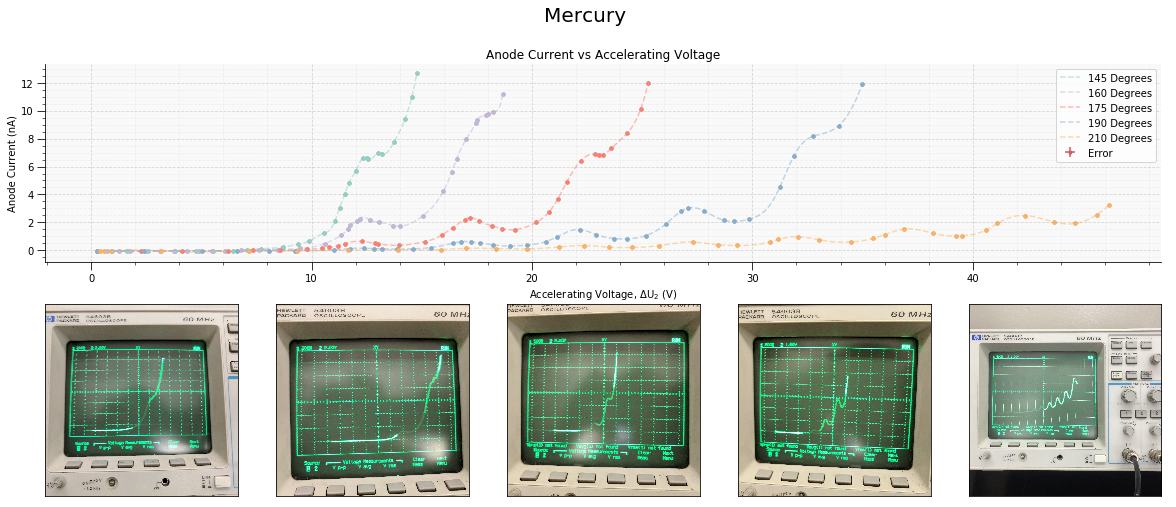

In [11]:
height_ratios = [4, 4]
width_ratios = [4,4,4,4,4]
wspace = 0
hspace = 0

fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('Mercury', fontsize=20)

ax = fig.add_subplot(gs[0, :])
ax.scatter(V_a_145, I_145, marker='o', s=12, c = colors[0])
ax.scatter(V_a_160, I_160, marker='o', s=12, c = colors[1])
ax.scatter(V_a_175, I_175, marker='o', s=12, c = colors[2])
ax.scatter(V_a_190, I_190, marker='o', s=12, c = colors[3])
ax.scatter(V_a_210, I_210, marker='o', s=12, c = colors[4])
ax.errorbar(V_a_145, I_145, xerr=0.00001, yerr=.01, fmt='.', c='indianred', label='Error', zorder=0)
ax.errorbar(V_a_160, I_160, xerr=0.00001, yerr=.01, fmt='.', c='indianred', zorder=0)
ax.errorbar(V_a_175, I_175, xerr=0.00001, yerr=.01, fmt='.', c='indianred', zorder=0)
ax.errorbar(V_a_190, I_190, xerr=0.00001, yerr=.01, fmt='.', c='indianred', zorder=0)
ax.errorbar(V_a_210, I_210, xerr=0.00001, yerr=.01, fmt='.', c='indianred', zorder=0)
plt.plot(xs_145, ys_145, '--', c=colors[0], alpha = .5, zorder=0, label='145 Degrees')
plt.plot(xs_160, ys_160, '--', c=colors[1], alpha = .5, zorder=0, label='160 Degrees')
plt.plot(xs_175, ys_175, '--', c=colors[2], alpha = .5, zorder=0, label='175 Degrees')
plt.plot(xs_190, ys_190, '--', c=colors[3], alpha = .5, zorder=0, label='190 Degrees')
plt.plot(xs_210, ys_210, '--', c=colors[4], alpha = .5, zorder=0, label='210 Degrees')
#ax.errorbar(V_a_190, I_190, xerr=0.00001, yerr=.001, fmt='.', c='indianred', label='Error', zorder=0)
ax.update({'title': 'Anode Current vs Accelerating Voltage',
            'xlabel': 'Accelerating Voltage, $\Delta$U$_{2}$ (V)',
            'ylabel': 'Anode Current (nA)'})
beautification()

ax = fig.add_subplot(gs[1,0])
Mercury145_img = plt.imread('Mercury145.JPG')
plt.imshow(Mercury145_img)
minimalization()

ax = fig.add_subplot(gs[1,1])
Mercury160_img = plt.imread('Mercury160.JPG')
plt.imshow(Mercury160_img)
minimalization()

ax = fig.add_subplot(gs[1,2])
Mercury175_img = plt.imread('Mercury175.JPG')
plt.imshow(Mercury175_img)
minimalization()

ax = fig.add_subplot(gs[1,3])
Mercury190_img = plt.imread('Mercury190.JPG')
plt.imshow(Mercury190_img)
minimalization()

ax = fig.add_subplot(gs[1,4])
Mercury210_img = plt.imread('Mercury210.JPG')
plt.imshow(Mercury210_img)
minimalization()


### Discussion and Conclusion:
Atoms can only absorb a discrete amount of energy, regardless the way the
energy is transferred to the atom.

### References:
Shoutout to the homies